## ASBD ENDSEM - CED19I027 - N. SREE DHYUTI

In [1]:
# CED19I027 - N. SREE DHYUTI - ASBD ENDSEM

# Import Required Libraries
import pandas as pd
import math
import random
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import openpyxl
from openpyxl.styles import PatternFill
import squarify
import stemgraphic
import plotly.graph_objects as go  
import plotly.express as px
import scipy.stats as stats
import mlxtend

**Load Dataset** 

In [2]:
data = pd.read_csv(r"01_District_wise_crimes_committed_IPC_2001_2012.csv")
data

STATE/UT       DISTRICT  YEAR  MURDER  ATTEMPT TO MURDER  \
0     ANDHRA PRADESH       ADILABAD  2001     101                 60   
1     ANDHRA PRADESH      ANANTAPUR  2001     151                125   
2     ANDHRA PRADESH       CHITTOOR  2001     101                 57   
3     ANDHRA PRADESH       CUDDAPAH  2001      80                 53   
4     ANDHRA PRADESH  EAST GODAVARI  2001      82                 67   
...              ...            ...   ...     ...                ...   
9012     LAKSHADWEEP    LAKSHADWEEP  2012       0                  0   
9013     LAKSHADWEEP          TOTAL  2012       0                  0   
9014      PUDUCHERRY       KARAIKAL  2012       5                  6   
9015      PUDUCHERRY     PUDUCHERRY  2012      24                 21   
9016      PUDUCHERRY          TOTAL  2012      29                 27   

      CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  CUSTODIAL RAPE  \
0                                            17    50               0   
1                                             1    23               0   
2                                             2    27               0   
3                                             1    20               0   
4                                             1    23               0   
...                                         ...   ...             ...   
9012                                          0     0               0   
9013                                          0     0               0   
9014                                          2     6               0   
9015                                         10     7               0   
9016                                         12    13               0   

      OTHER RAPE  KIDNAPPING & ABDUCTION  ...  ARSON  HURT/GREVIOUS HURT  \
0             50                      46  ...     30                1131   
1             23                      53  ...     69                1543   
2             27                      59  ...     38                2088   
3             20                      25  ...     23                 795   
4             23                      49  ...     41                1244   
...          ...                     ...  ...    ...                 ...   
9012           0                       0  ...      3                   3   
9013           0                       0  ...      3                   3   
9014           6                       2  ...      1                 186   
9015           7                      17  ...     20                 632   
9016          13                      19  ...     21                 818   

      DOWRY DEATHS  ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY  \
0               16                                                149     
1                7                                                118     
2               14                                                112     
3               17                                                126     
4               12                                                109     
...            ...                                                ...     
9012             0                                                  1     
9013             0                                                  1     
9014             0                                                  2     
9015             0                                                  7     
9016             0                                                  9     

      INSULT TO MODESTY OF WOMEN  CRUELTY BY HUSBAND OR HIS RELATIVES  \
0                             34                                  175   
1                             24                                  154   
2                             83                                  186   
3                             38                                   57   
4                             58                                  247   
...               

In [3]:
data.columns

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES'],
      dtype='object')

## About the dataset: 

https://www.kaggle.com/datasets/rajanand/crime-in-india?resource=download

- State/UT - State or Union Territory from where the crime data is recorded
- District - District from where the crime data is recorded
- Year - Year when the crime data is recorded

**Number of Cases of...**

- Murder 
- Attempt to Murder
- Culpable Homicide not amounting to murder 
- Rape 
- Custodial Rape 
- Other Rape
- Kidnapping and abduction 
- Kidnapping and abduction of women & girls 
- Kidnapping and abduction of others 
- Dacoity 
- Preparation and assembly for dacoity
- Robbery
- Burglary
- Theft
- Auto Theft
- Other Theft
- Riots
- Criminal Breach of Trust
- Cheating
- Counterfieting
- Arson
- Hurt/Grevious Hurt
- Dowry Deaths
- Assault on women with intent to outrage her modesty
- Insult to modesty of women
- Cruelty by husband or his relatives
- Importation of girls from foreign countries
- Causing death by negligence
- Other IPC Crimes
- Total IPC Crimes

## Data Preprocessing

1. Selection
- Column named "Custodian Rape" can be dropped as no such cases were observed anywhere
- Column named "Kidnapping and abduction" can be removed as it is just a sum of attribute values of columns "Kidnapping and abduction of women & girls" and "Kidnapping and abduction of others"
- Similarly, "Theft" = "Auto Theft" + "Other Theft" and thus "Theft" can be dropped to save space
- Similarly, columns "Total IPC Crimes" can also be removed. 
- All of this will help save on storage


In [4]:
all_attributes = list(data.columns)
drop_attributes = ["CUSTODIAL RAPE", "THEFT","KIDNAPPING & ABDUCTION", "TOTAL IPC CRIMES"]

req_attributes = []
for i in all_attributes:
    if i not in drop_attributes:
        req_attributes.append(i)
        
print("After Selection, Attributes being used are:")
for i in req_attributes:
    print(i)
    
data1 = data[req_attributes]

After Selection, Attributes being used are:
STATE/UT
DISTRICT
YEAR
MURDER
ATTEMPT TO MURDER
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER
RAPE
OTHER RAPE
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS
KIDNAPPING AND ABDUCTION OF OTHERS
DACOITY
PREPARATION AND ASSEMBLY FOR DACOITY
ROBBERY
BURGLARY
AUTO THEFT
OTHER THEFT
RIOTS
CRIMINAL BREACH OF TRUST
CHEATING
COUNTERFIETING
ARSON
HURT/GREVIOUS HURT
DOWRY DEATHS
ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY
INSULT TO MODESTY OF WOMEN
CRUELTY BY HUSBAND OR HIS RELATIVES
IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES
CAUSING DEATH BY NEGLIGENCE
OTHER IPC CRIMES


2. Cleaning
- The data has no Null Values or discrepancies
- The rows with totallings can avoid unnecesary additions in the data

In [5]:
data1.dropna(axis=0)

STATE/UT       DISTRICT  YEAR  MURDER  ATTEMPT TO MURDER  \
0     ANDHRA PRADESH       ADILABAD  2001     101                 60   
1     ANDHRA PRADESH      ANANTAPUR  2001     151                125   
2     ANDHRA PRADESH       CHITTOOR  2001     101                 57   
3     ANDHRA PRADESH       CUDDAPAH  2001      80                 53   
4     ANDHRA PRADESH  EAST GODAVARI  2001      82                 67   
...              ...            ...   ...     ...                ...   
9012     LAKSHADWEEP    LAKSHADWEEP  2012       0                  0   
9013     LAKSHADWEEP          TOTAL  2012       0                  0   
9014      PUDUCHERRY       KARAIKAL  2012       5                  6   
9015      PUDUCHERRY     PUDUCHERRY  2012      24                 21   
9016      PUDUCHERRY          TOTAL  2012      29                 27   

      CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  OTHER RAPE  \
0                                            17    50          50   
1                                             1    23          23   
2                                             2    27          27   
3                                             1    20          20   
4                                             1    23          23   
...                                         ...   ...         ...   
9012                                          0     0           0   
9013                                          0     0           0   
9014                                          2     6           6   
9015                                         10     7           7   
9016                                         12    13          13   

      KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS  \
0                                              30   
1                                              30   
2                                              34   
3                                              20   
4                                              26   
...                                           ...   
9012                                            0   
9013                                            0   
9014                                            2   
9015                                           14   
9016                                           16   

      KIDNAPPING AND ABDUCTION OF OTHERS  ...  COUNTERFIETING  ARSON  \
0                                     16  ...               1     30   
1                                     23  ...               8     69   
2                                     25  ...               9     38   
3                                      5  ...               2     23   
4                                     23  ...               3     41   
...                                  ...  ...             ...    ...   
9012                                   0  ...               0      3   
9013                                   0  ...               0      3   
9014                                   0  ...               1      1   
9015                                   3  ...               5     20   
9016                                   3  ...               6     21   

      HURT/GREVIOUS HURT  DOWRY DEATHS  \
0                   1131            16   
1                   1543             7   
2                   2088            14   
3                    795            17   
4                   1244            12   
...                  ...           ...   
9012                   3             0   
9013                   3             0   
9014                 186             0   
9015                 632             0   
9016                 818             0   

      ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY  \
0                                                   149     
1                                                   118     
2                                                   112     
3                                                   126     
4     

In [6]:
dropp = []
for i in data1.index:
    if data1["DISTRICT"][i] == "TOTAL":
        dropp.append(i)
data1 = data1.drop(dropp) 
data1

STATE/UT       DISTRICT  YEAR  MURDER  ATTEMPT TO MURDER  \
0     ANDHRA PRADESH       ADILABAD  2001     101                 60   
1     ANDHRA PRADESH      ANANTAPUR  2001     151                125   
2     ANDHRA PRADESH       CHITTOOR  2001     101                 57   
3     ANDHRA PRADESH       CUDDAPAH  2001      80                 53   
4     ANDHRA PRADESH  EAST GODAVARI  2001      82                 67   
...              ...            ...   ...     ...                ...   
9010        DELHI UT            STF  2012       0                  1   
9011        DELHI UT           WEST  2012      52                 37   
9012     LAKSHADWEEP    LAKSHADWEEP  2012       0                  0   
9014      PUDUCHERRY       KARAIKAL  2012       5                  6   
9015      PUDUCHERRY     PUDUCHERRY  2012      24                 21   

      CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  OTHER RAPE  \
0                                            17    50          50   
1                                             1    23          23   
2                                             2    27          27   
3                                             1    20          20   
4                                             1    23          23   
...                                         ...   ...         ...   
9010                                          0     0           0   
9011                                         10    79          79   
9012                                          0     0           0   
9014                                          2     6           6   
9015                                         10     7           7   

      KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS  \
0                                              30   
1                                              30   
2                                              34   
3                                              20   
4                                              26   
...                                           ...   
9010                                            0   
9011                                          256   
9012                                            0   
9014                                            2   
9015                                           14   

      KIDNAPPING AND ABDUCTION OF OTHERS  ...  COUNTERFIETING  ARSON  \
0                                     16  ...               1     30   
1                                     23  ...               8     69   
2                                     25  ...               9     38   
3                                      5  ...               2     23   
4                                     23  ...               3     41   
...                                  ...  ...             ...    ...   
9010                                   0  ...               2      0   
9011                                 198  ...               2     18   
9012                                   0  ...               0      3   
9014                                   0  ...               1      1   
9015                                   3  ...               5     20   

      HURT/GREVIOUS HURT  DOWRY DEATHS  \
0                   1131            16   
1                   1543             7   
2                   2088            14   
3                    795            17   
4                   1244            12   
...                  ...           ...   
9010                   0             0   
9011                 227            18   
9012                   3             0   
9014                 186             0   
9015                 632             0   

      ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY  \
0                                                   149     
1                                                   118     
2                                                   112     
3                                                   126     
4     

3. Normalization



In [7]:
# # Z-Score Normalization

# for i in range(3, len(data1.columns)):
#     data = np.array(data1[data1.columns[i]])
#     data1[data1.columns[i]] = stats.zscore(data1["MURDER"])
# # data = np.array(data1["MURDER"])
# # print("\n Using Scipy:")
# # print(stats.zscore(data1["MURDER"]))


4. Data Transformation

In [8]:
def binning_median(param):
    num_bins = 250
#     data2 = data1.sort_values(by=[param])
    bin_size = math.ceil(data1.shape[0]/num_bins)
    
    bins = []
    binn = []
    for i in data1.index:  
        binn.append(int(data1[str(param)][i]))
        if(len(binn) == bin_size):
            bins.append(binn)
            binn = []

    cnt = 0
    for i in data1.index:
        if (cnt//bin_size) != 0:
            bin_mean = statistics.median(bins[(cnt//bin_size)-1])
        else:
            bin_mean = statistics.median(bins[(cnt//bin_size)])
        cnt += 1
        if data1[param][i] == 0:
            data1.at[i, param] = bin_mean
    return 

for i in range(3, len(data1.columns)):
    binning_median(data1.columns[i])


In [9]:
print("After data preprocessing, data is as follows:")
data1

After data preprocessing, data is as follows:


STATE/UT       DISTRICT  YEAR  MURDER  ATTEMPT TO MURDER  \
0     ANDHRA PRADESH       ADILABAD  2001     101                 60   
1     ANDHRA PRADESH      ANANTAPUR  2001     151                125   
2     ANDHRA PRADESH       CHITTOOR  2001     101                 57   
3     ANDHRA PRADESH       CUDDAPAH  2001      80                 53   
4     ANDHRA PRADESH  EAST GODAVARI  2001      82                 67   
...              ...            ...   ...     ...                ...   
9010        DELHI UT            STF  2012      52                  1   
9011        DELHI UT           WEST  2012      52                 37   
9012     LAKSHADWEEP    LAKSHADWEEP  2012      52                 32   
9014      PUDUCHERRY       KARAIKAL  2012       5                  6   
9015      PUDUCHERRY     PUDUCHERRY  2012      24                 21   

      CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  OTHER RAPE  \
0                                            17    50          50   
1                                             1    23          23   
2                                             2    27          27   
3                                             1    20          20   
4                                             1    23          23   
...                                         ...   ...         ...   
9010                                          9    35          35   
9011                                         10    79          79   
9012                                          9    35          35   
9014                                          2     6           6   
9015                                         10     7           7   

      KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS  \
0                                              30   
1                                              30   
2                                              34   
3                                              20   
4                                              26   
...                                           ...   
9010                                           65   
9011                                          256   
9012                                           65   
9014                                            2   
9015                                           14   

      KIDNAPPING AND ABDUCTION OF OTHERS  ...  COUNTERFIETING  ARSON  \
0                                     16  ...               1     30   
1                                     23  ...               8     69   
2                                     25  ...               9     38   
3                                      5  ...               2     23   
4                                     23  ...               3     41   
...                                  ...  ...             ...    ...   
9010                                   8  ...               2      3   
9011                                 198  ...               2     18   
9012                                   8  ...               3      3   
9014                                   8  ...               1      1   
9015                                   3  ...               5     20   

      HURT/GREVIOUS HURT  DOWRY DEATHS  \
0                   1131            16   
1                   1543             7   
2                   2088            14   
3                    795            17   
4                   1244            12   
...                  ...           ...   
9010                  93            15   
9011                 227            18   
9012                   3            15   
9014                 186            15   
9015                 632            15   

      ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY  \
0                                                   149     
1                                                   118     
2                                                   112     
3                                                   126     
4     

## Descriptive Analytics

In [10]:
# State Wise Data
states = []

for i in data1.index:
    if data1["STATE/UT"][i] not in states:
        states.append(data1["STATE/UT"][i])

murder = [0]*len(states)
atm = [0]*len(states)
homicide = [0]*len(states)
rape = [0]*len(states)
othr_rape = [0]*len(states)
kidnap_girl = [0]*len(states)
kidnap_others = [0]*len(states)
dacoit = [0]*len(states)
prep_dacoit = [0]*len(states)
robbery = [0]*len(states)
burglary = [0]*len(states)
auto_theft = [0]*len(states)
other_theft = [0]*len(states)
riots = [0]*len(states)
trust = [0]*len(states)
cheat = [0]*len(states)
counterfiet = [0]*len(states)
arson = [0]*len(states)
hurt = [0]*len(states)
dowry = [0]*len(states)
assault = [0]*len(states)
insult_women = [0]*len(states)
cruelty = [0]*len(states)
import_women = [0]*len(states)
negligence = [0]*len(states)
other = [0]*len(states)

attributes = [murder, atm, homicide, rape, othr_rape, kidnap_girl, kidnap_others,
              dacoit, prep_dacoit, robbery, burglary, auto_theft, other_theft,
              riots, trust, cheat, counterfiet, arson, hurt, dowry, assault,
              insult_women, cruelty, import_women, negligence, other]

for i in data1.index:
    state = data1["STATE/UT"][i]
    indexx = states.index(state)
    for j in range(len(attributes)):
        attributes[j][indexx] += data1[data1.columns[j+3]][i]      

Bar Graphs

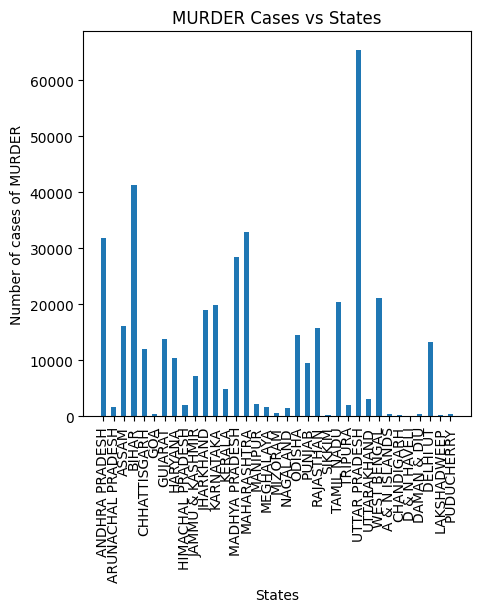

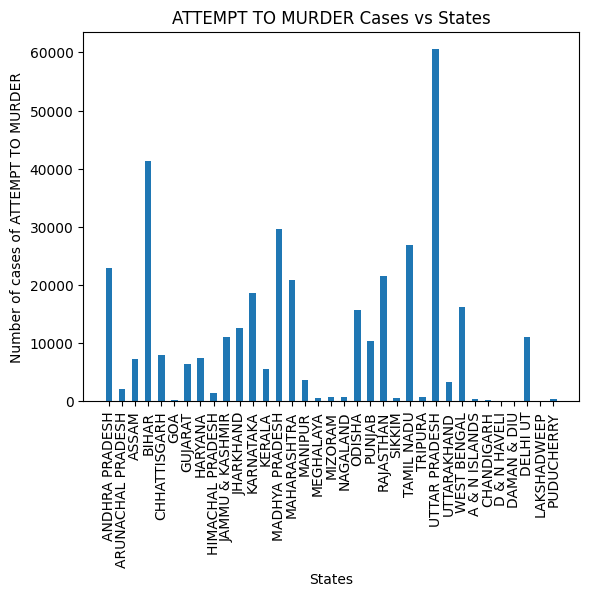

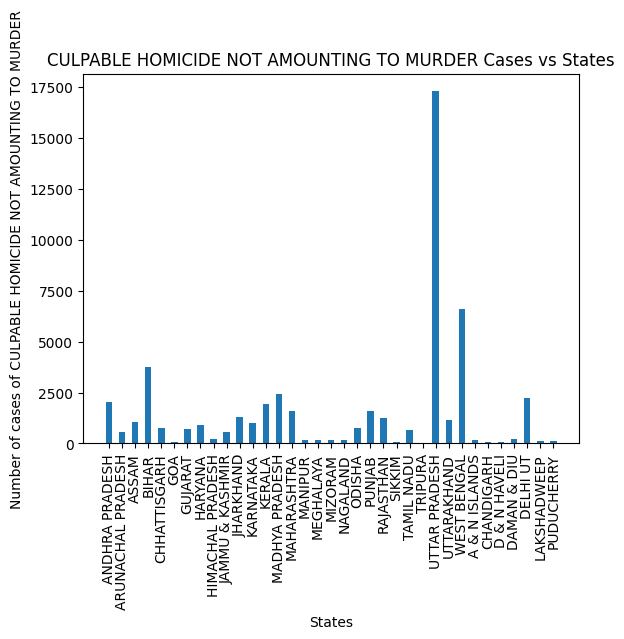

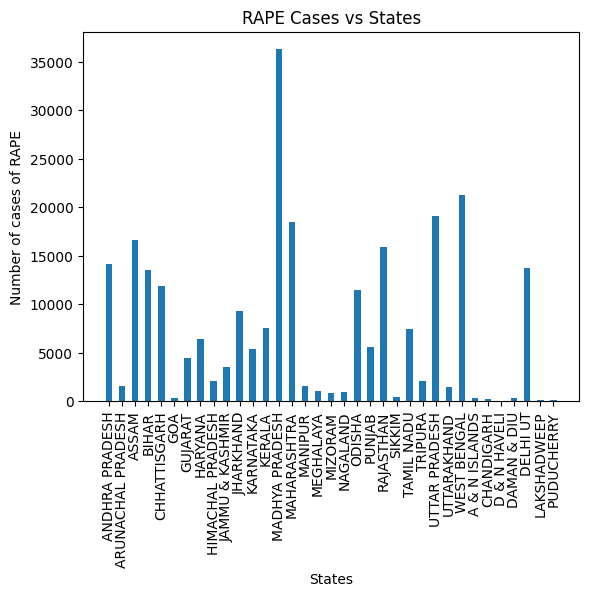

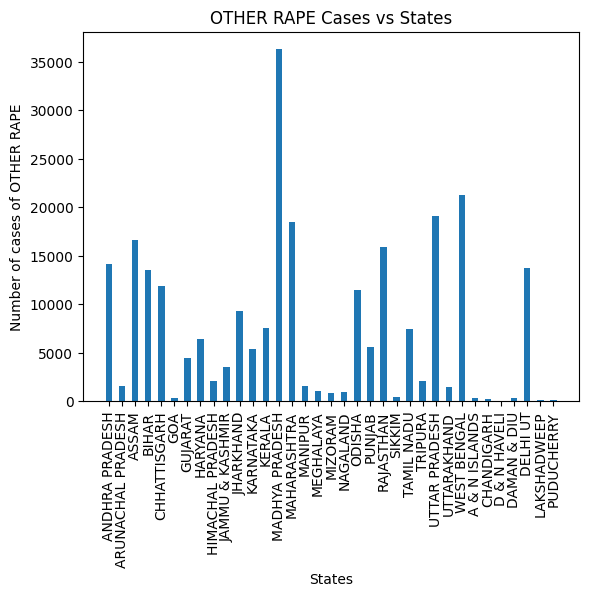

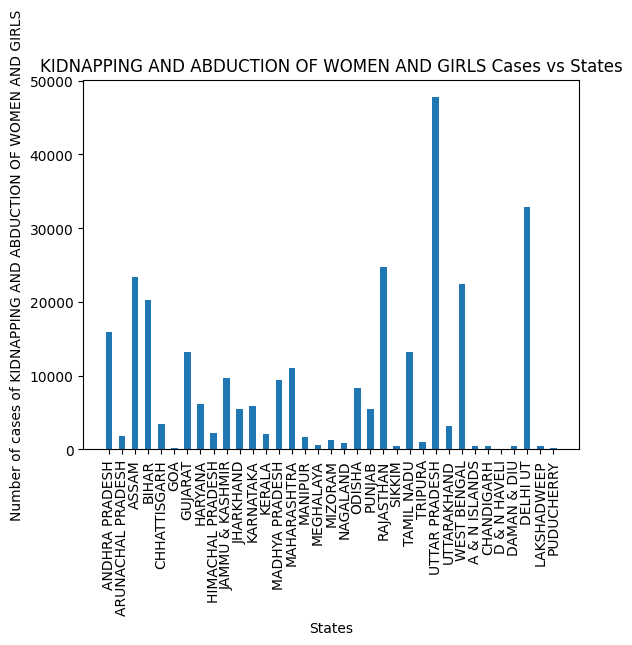

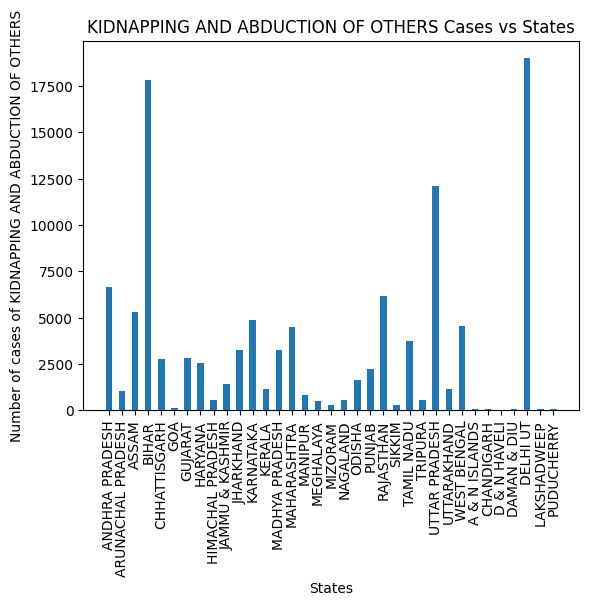

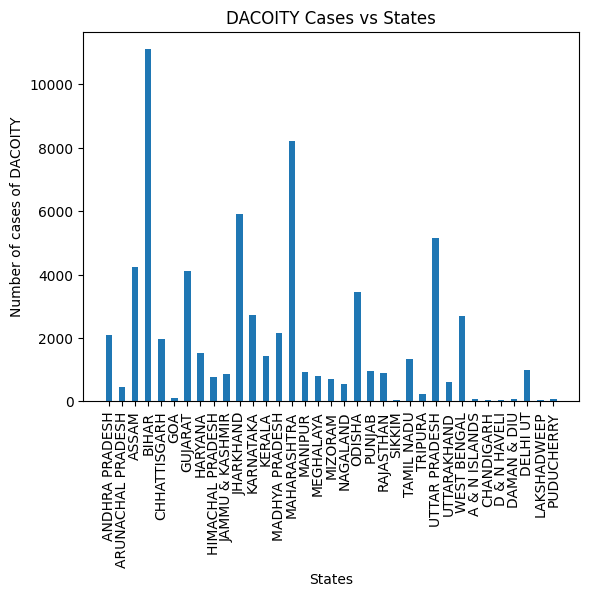

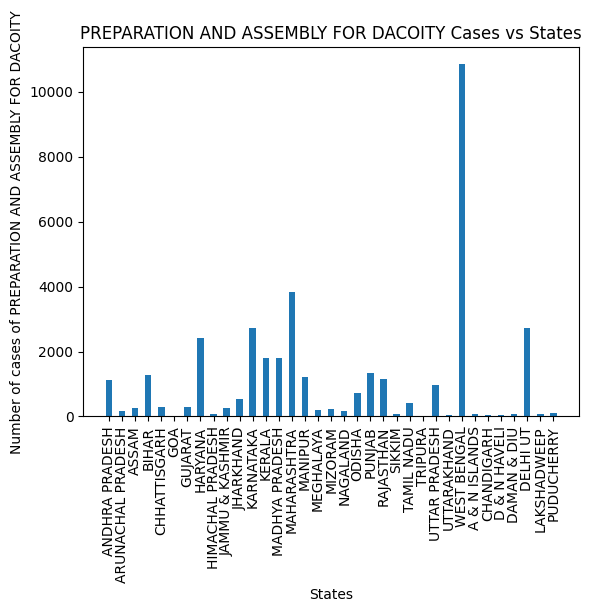

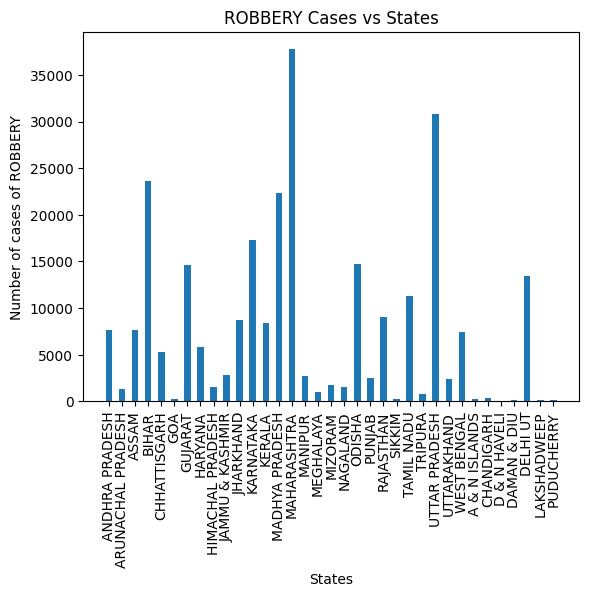

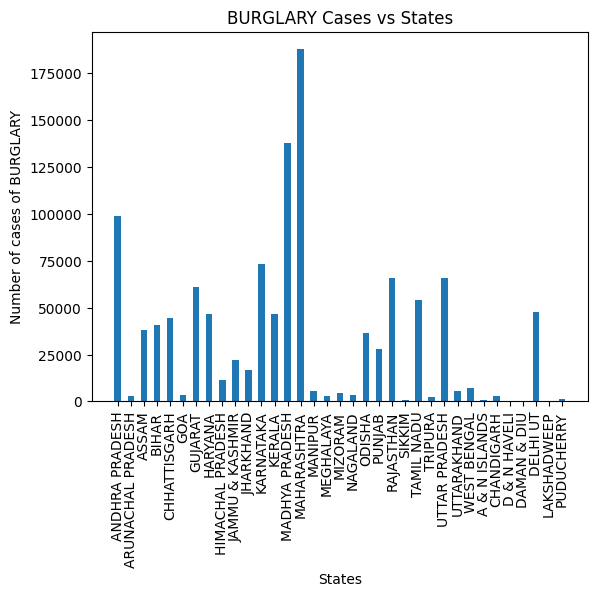

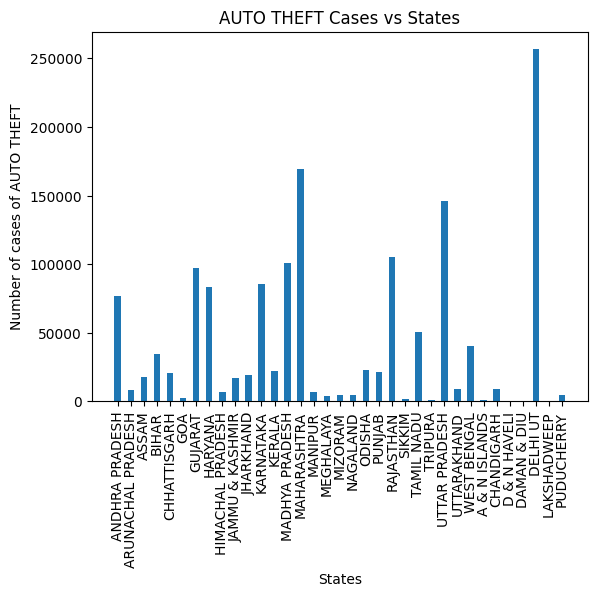

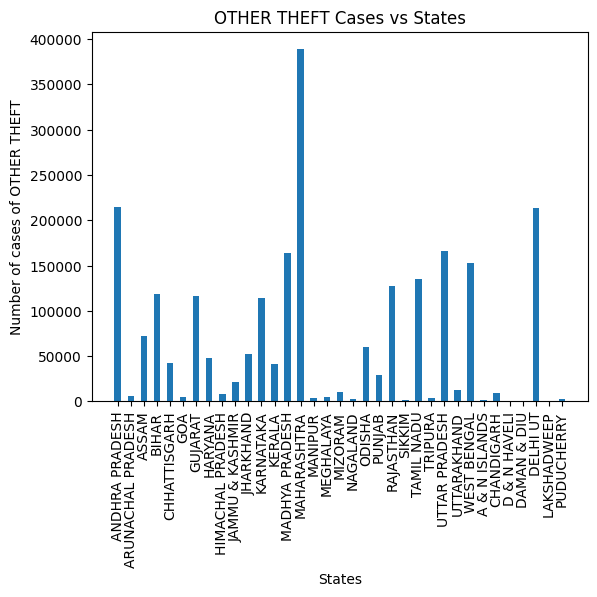

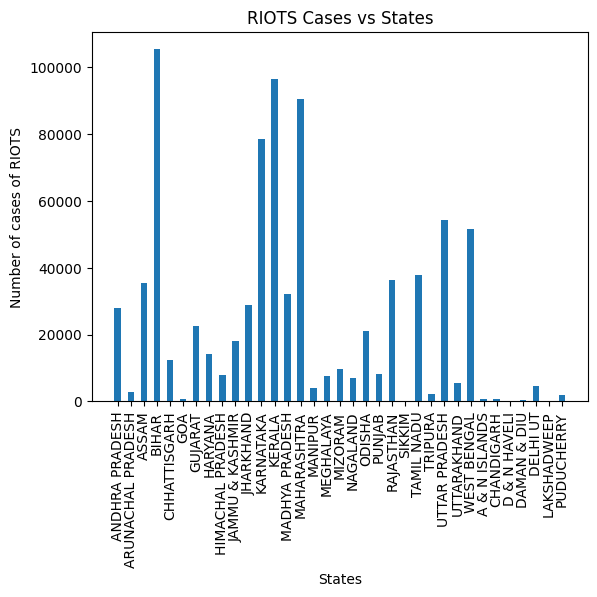

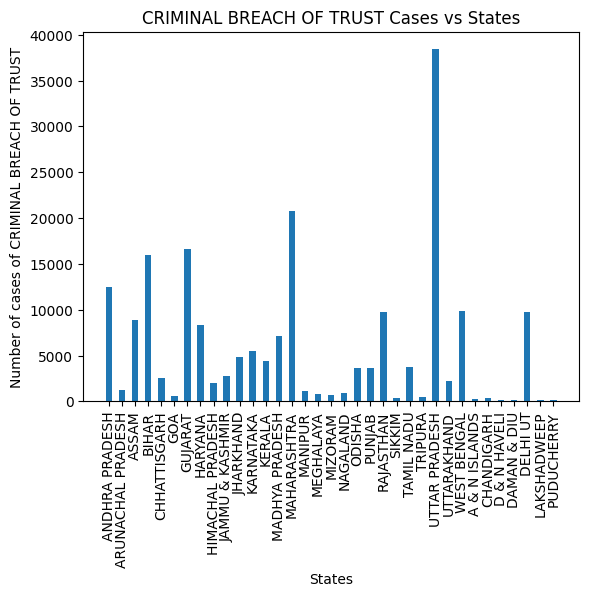

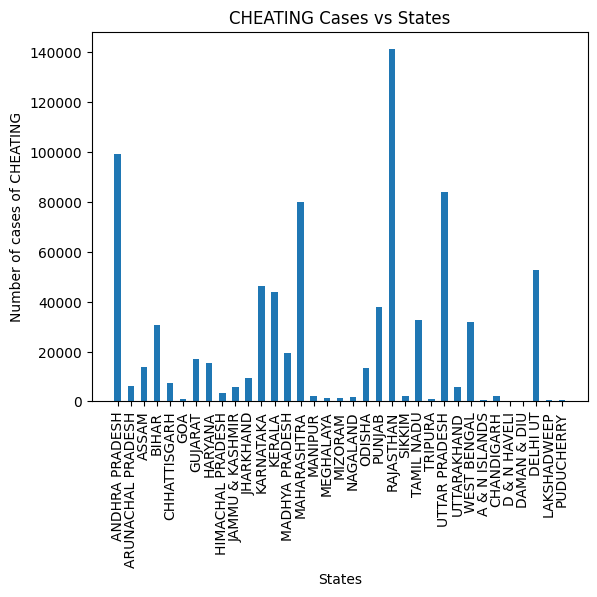

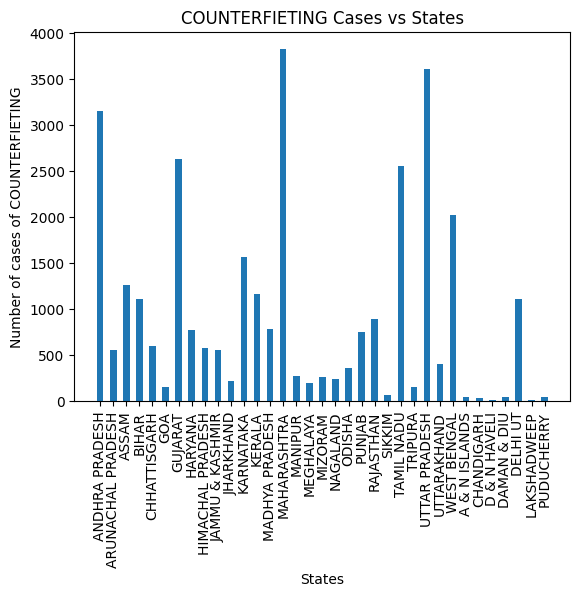

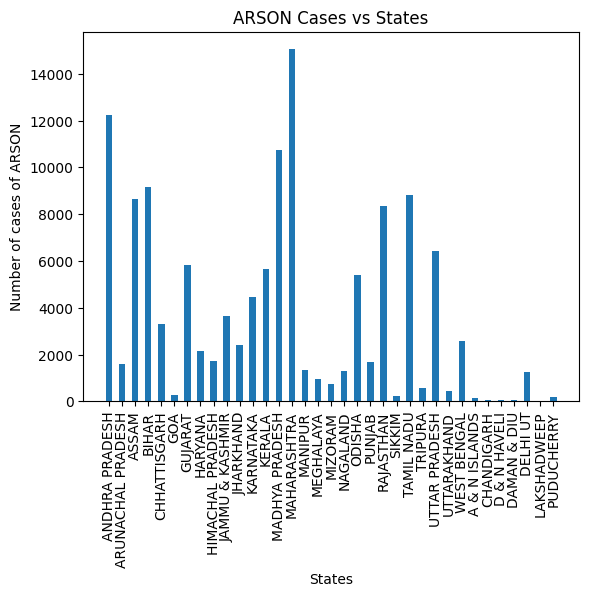

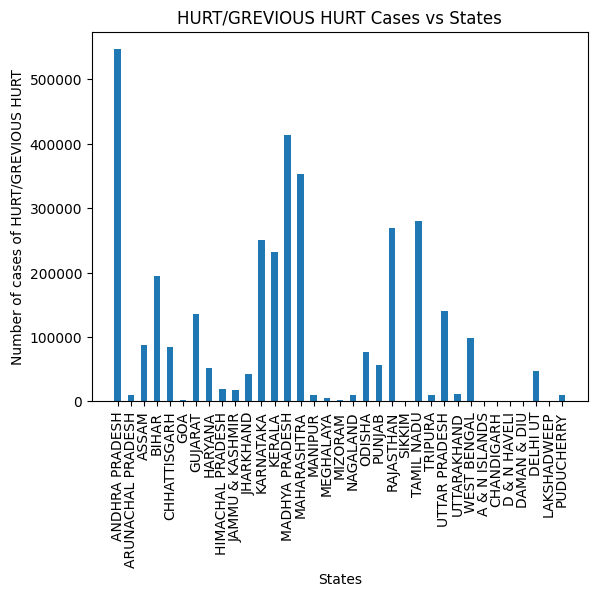

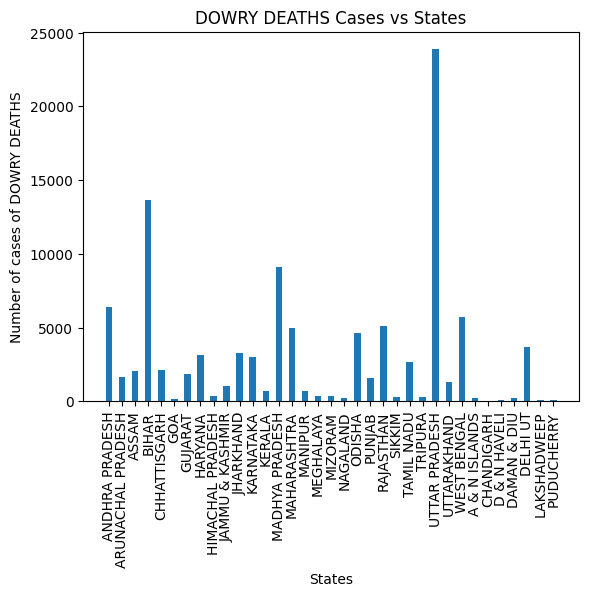

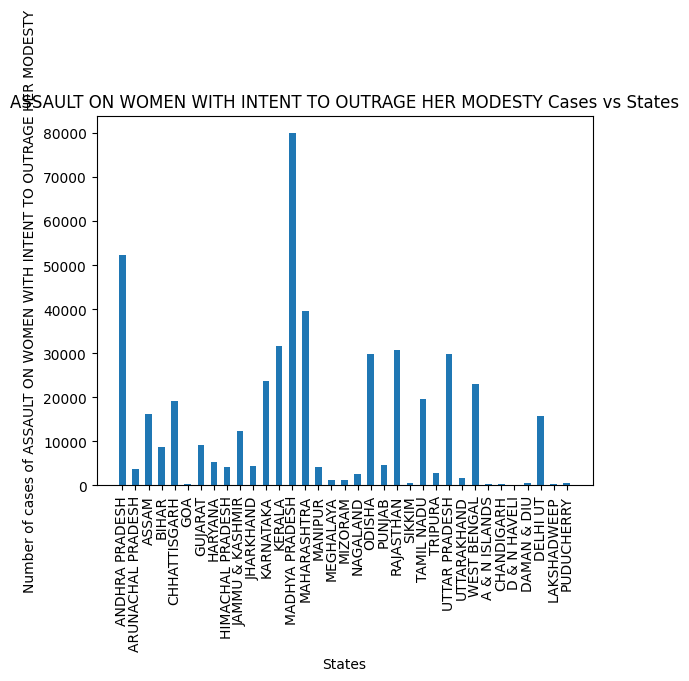

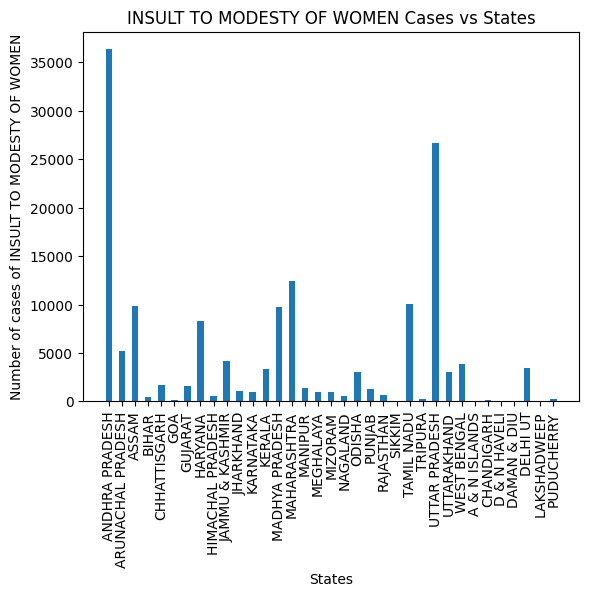

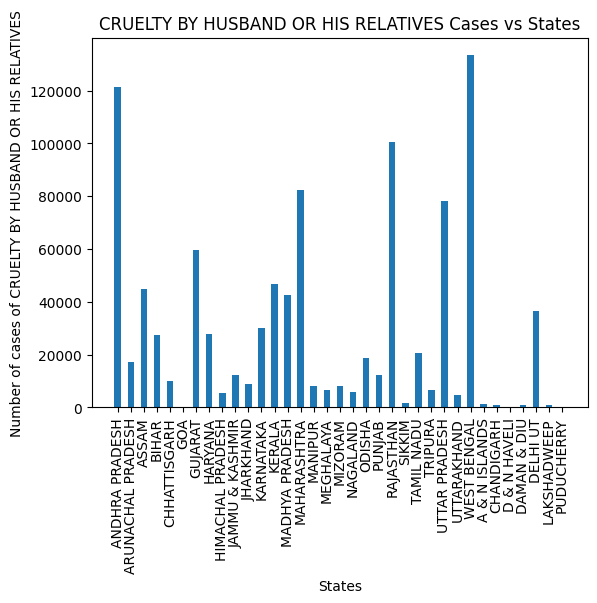

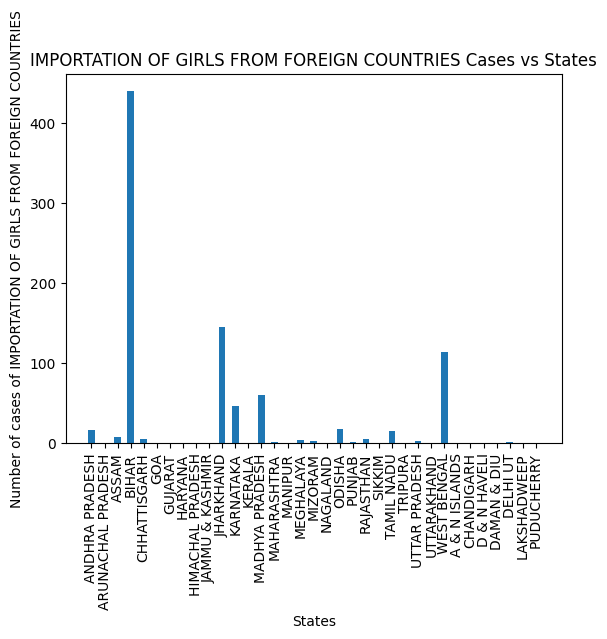

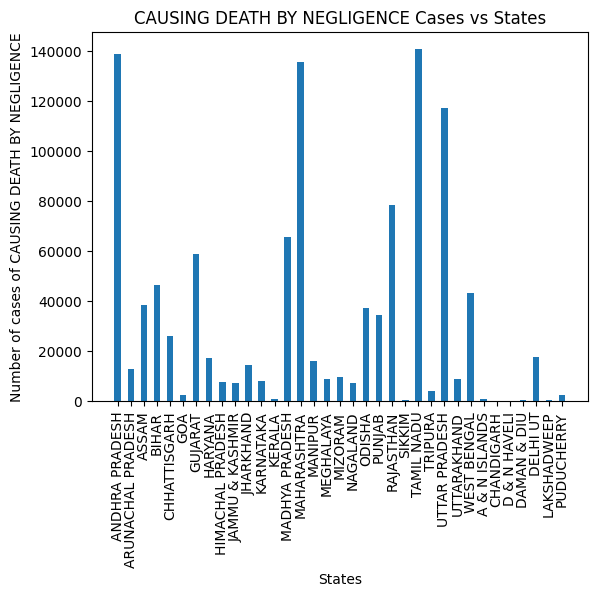

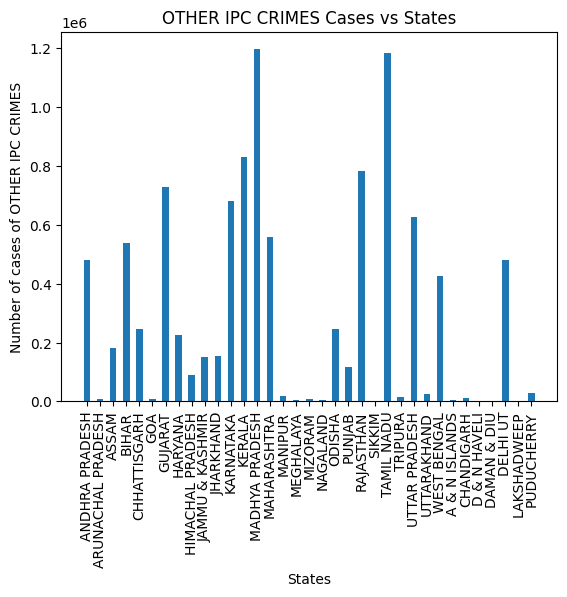

In [11]:
# Bar Chart
fig = plt.figure(figsize = (5, 5))
# creating the bar plot
for i in range(len(attributes)):
    plt.bar(states, attributes[i], width = 0.5)
    plt.xlabel("States")
    plt.ylabel(f"Number of cases of {data1.columns[i+3]}")
    plt.title(f"{data1.columns[i+3]} Cases vs States")
    plt.xticks(rotation=90)
    plt.show()

## Observations:


In [12]:
# Finding the states with Most Frequent Crime:
crimes_states = []
print("Crimes and State where it happens the most\n\n")
for i in range(len(attributes)):
    crime_max = max(attributes[i])
    indexx = attributes[i].index(crime_max)
    print(f"Crime: {data1.columns[i+3]} \nMost Frequently in State: {states[indexx]}\n\n")
    crimes_states.append(states[indexx])

Crimes and State where it happens the most


Crime: MURDER 
Most Frequently in State: UTTAR PRADESH


Crime: ATTEMPT TO MURDER 
Most Frequently in State: UTTAR PRADESH


Crime: CULPABLE HOMICIDE NOT AMOUNTING TO MURDER 
Most Frequently in State: UTTAR PRADESH


Crime: RAPE 
Most Frequently in State: MADHYA PRADESH


Crime: OTHER RAPE 
Most Frequently in State: MADHYA PRADESH


Crime: KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS 
Most Frequently in State: UTTAR PRADESH


Crime: KIDNAPPING AND ABDUCTION OF OTHERS 
Most Frequently in State: DELHI UT


Crime: DACOITY 
Most Frequently in State: BIHAR


Crime: PREPARATION AND ASSEMBLY FOR DACOITY 
Most Frequently in State: WEST BENGAL


Crime: ROBBERY 
Most Frequently in State: MAHARASHTRA


Crime: BURGLARY 
Most Frequently in State: MAHARASHTRA


Crime: AUTO THEFT 
Most Frequently in State: DELHI UT


Crime: OTHER THEFT 
Most Frequently in State: MAHARASHTRA


Crime: RIOTS 
Most Frequently in State: BIHAR


Crime: CRIMINAL BREACH OF TRUST 
M

Pie Chart

States with maximum Crimes in Decreasing Order:
['UTTAR PRADESH', 'MAHARASHTRA', 'MADHYA PRADESH', 'BIHAR', 'WEST BENGAL', 'DELHI UT', 'ANDHRA PRADESH', 'TAMIL NADU', 'RAJASTHAN']


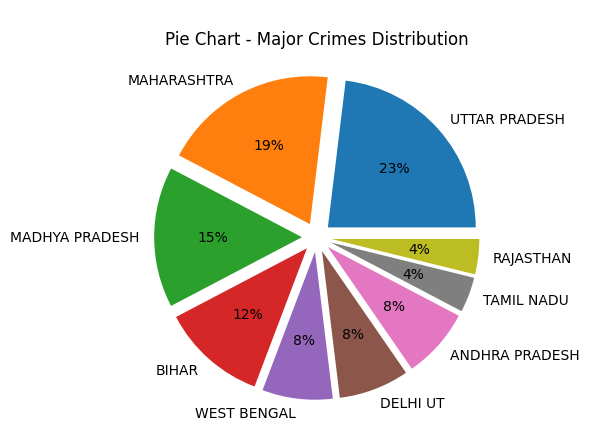

In [13]:
check = list(set(crimes_states))
print("States with maximum Crimes in Decreasing Order:")

stat = [0]*len(check)
for i in crimes_states:
    ind = check.index(i)
    stat[ind] += 1

sortedd = [x for _, x in sorted(zip(stat, check))]

print(list(reversed(sortedd)))

sort_sorted = [x for _, x in sorted(zip(stat, stat))]
# plotting data on chart
explode = [0.1]*len(sortedd)
plt.pie(list(reversed(sort_sorted)), labels=list(reversed(sortedd)), explode=explode, autopct='%.0f%%')
  
# displaying chart
plt.title("\nPie Chart - Major Crimes Distribution")
plt.show()

## Observations:

- It can be noted that Uttar Pradesh, Madhya Pradesh, Maharashtra and Bihar have the most cases of crime happening in India


Line Graphs

## Let us now closely look at the crime situations in Maharashtra, UP, MP & Bihar

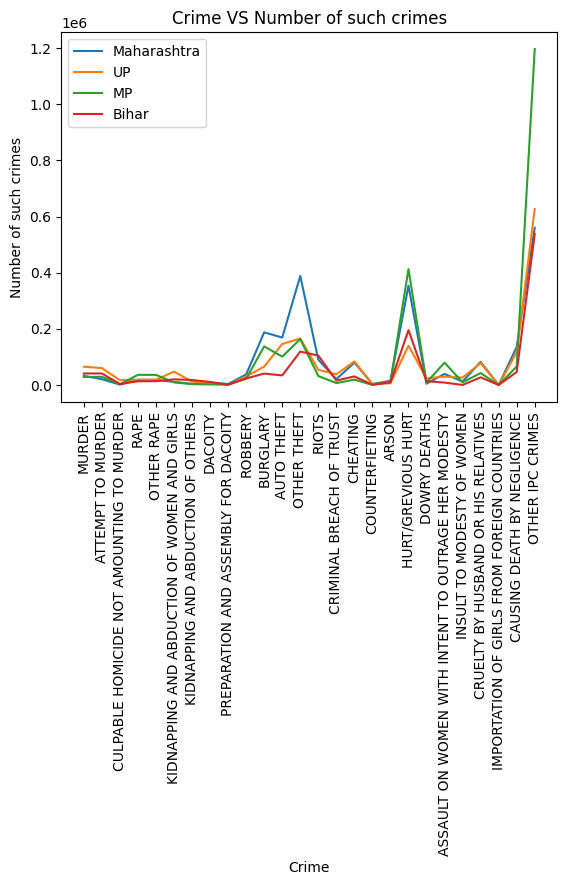

In [14]:
maharashtra = []
up = []
mp = []
bihar = []

mh_index = states.index("MAHARASHTRA")
up_index = states.index("UTTAR PRADESH")
mp_index = states.index("MADHYA PRADESH")
bihar_index = states.index("BIHAR")

for i in attributes:
    maharashtra.append(i[mh_index])
    up.append(i[up_index])
    mp.append(i[mp_index])
    bihar.append(i[bihar_index])

for i in [maharashtra, up, mp, bihar]:
    plt.plot(data1.columns[3:], np.array(i))
plt.xlabel(f"Crime")
plt.ylabel(f"Number of such crimes")
plt.title(f"Crime VS Number of such crimes")
plt.legend(['Maharashtra', 'UP', 'MP', 'Bihar'])
plt.xticks(rotation=90)
plt.show()

## Observations:
- Using line graphs, we can clearly see how all the 4 states are differing in terms of each crime.
-  Crimes like Murders, Attempts to murder, Rapes, kidnapping, dacoity, riots, cheating, counterfeiting, assaults and insults on women, and other crimes are occuring at similar rates in all the 4 states
- Robberies, Burglaries and Thefts are comparatively higher in Maharashtra followed by Madhya Pradesh, Uttar Pradesh and Bihar respectively
- Arson is majorly high in Madhya Pradesh followed by Maharashtra, Bihar and Uttar Pradesh respectively
- Overall, the ratio of all crimes are almost same as the shapes of lines are almost same for all the 4 states


Scatter Plots

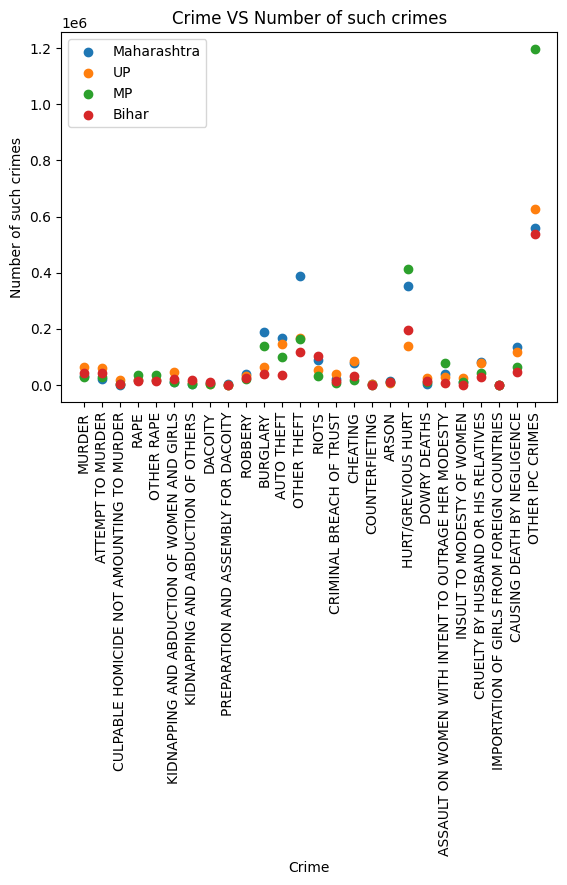

In [15]:
for i in [maharashtra, up, mp, bihar]:
    plt.scatter(data1.columns[3:], np.array(i))
plt.xlabel(f"Crime")
plt.ylabel(f"Number of such crimes")
plt.title(f"Crime VS Number of such crimes")
plt.legend(['Maharashtra', 'UP', 'MP', 'Bihar'])
plt.xticks(rotation=90)
plt.show()

## Observations:
- Conclusions from scatter plots and line graphs should be same.
- It can be seen that even here, the dots of scatter plots in most places are coinciding with each other, implying that the crime rates for some crimes like murders, attempt to murders, rapes, kidnapping, dacoity, etc are almost same in all 4 states.


Box - Whisker Plots

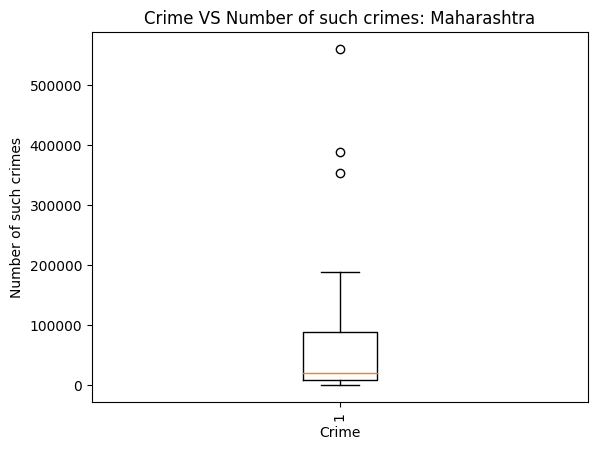

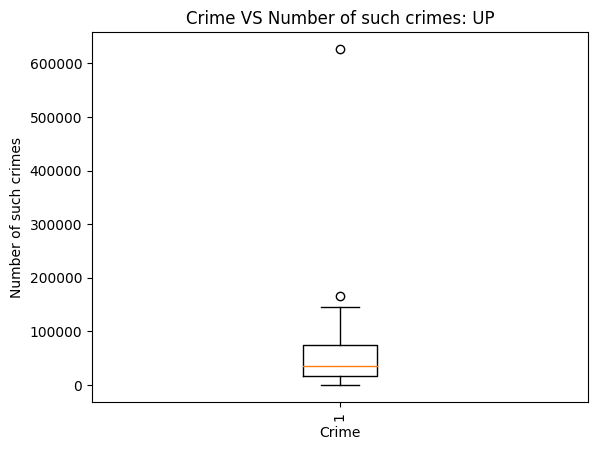

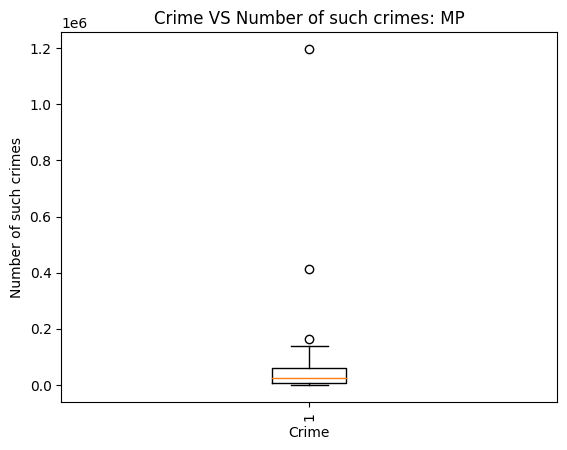

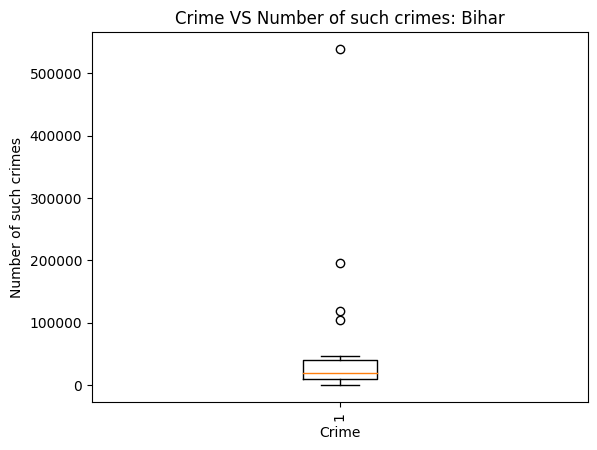

In [16]:
s = ['Maharashtra', 'UP', 'MP', 'Bihar']
cnt = 0
for i in [maharashtra, up, mp, bihar]:
    plt.boxplot(i)
    plt.xlabel(f"Crime")
    plt.ylabel(f"Number of such crimes")
    plt.title(f"Crime VS Number of such crimes: {s[cnt]}")
    cnt += 1
    plt.xticks(rotation=90)
    plt.show()
    

## Observations:
**1. Maharashtra**
- It can be noticed that the crimes in Maharashtra are varying very much w.r.t each other as the median or 2nd quartile is towards the bottom, we can say that various crimes happen at totally unrelated rates in Maharashtra
- As the data is right skewed, it can also be said that the minimum number of each crimes that occurs in Maharashtra is less
- The data has 3 outliers on the top, which implies that three types of crimes happen at a very high rate when compared to others in Maharashtra


**2. Uttar Pradesh**
- It can be noticed that the crimes in Uttar Pradesh are varying very much w.r.t each other as the median or 2nd quartile is towards the bottom, we can say that various crimes happen at totally unrelated rates in Uttar Pradesh
- As the data is right skewed, it can also be said that the minimum number of each crimes that occurs in Uttar Pradesh is less
- The data has 1 outlier on the top, which implies that one type of crime happens at a very high rate when compared to others in Uttar Pradesh

**3. Madhya Pradesh**
- It can be noticed that the crimes in Madhya Pradesh are not varying very much w.r.t each other.
- All the three quartiles, Q1, Q2, Q3 are not scattered and are very close to each other, implying that the number of occurrences of each crime is not that much varied from the number of occurrences of other crimes. 
- The number of occurrences of each crime are closer, implying that all the crimes can be related. It is also optimum to conclude that all the crimes are committed by the same or closely related set of people as the crime numbers are almost the same.
- Data is not much skewed
- The data has 3 outliers on the top, where one outlier is a little close to the whisker, another outlier is slightly far away from the top whisker and another outlier is very far away from the top whisker. This means that one of the crime occurs slightly higher than than the other crimes, another occurs at a much higher rate than other crimes and one crime occurs at very very high rates when compared to other crimes

**4. Bihar**
- It can be noticed that the crimes in Bihar are not varying very much w.r.t each other.
- All the three quartiles, Q1, Q2, Q3 are not scattered and are very close to each other, implying that the number of occurrences of each crime is not that much varied from the number of occurrences of other crimes. 
- The number of occurrences of each crime are closer, implying that all the crimes can be related. It is also optimum to conclude that all the crimes are committed by the same or closely related set of people as the crime numbers are almost the same.
- Data is not much skewed
- The data has 4 outliers on the top, where two outliers are a little close to the whisker, another outlier is slightly far away from the top whisker and another outlier is very far away from the top whisker. This means that two of the crimes occur slightly higher than than the other crimes, another occurs at a much higher rate than other crimes and one crime occurs at very very high rates when compared to other crimes

Violin Plots

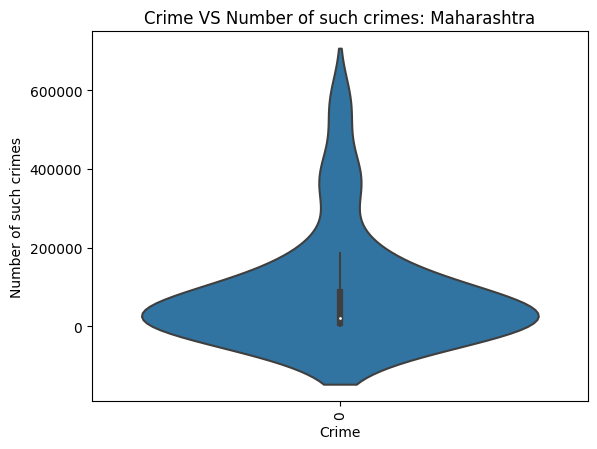

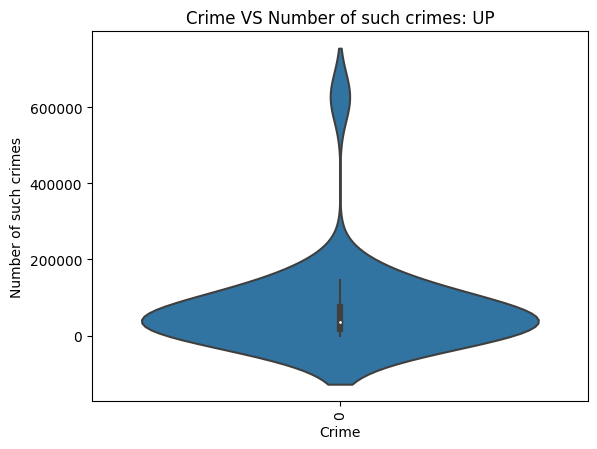

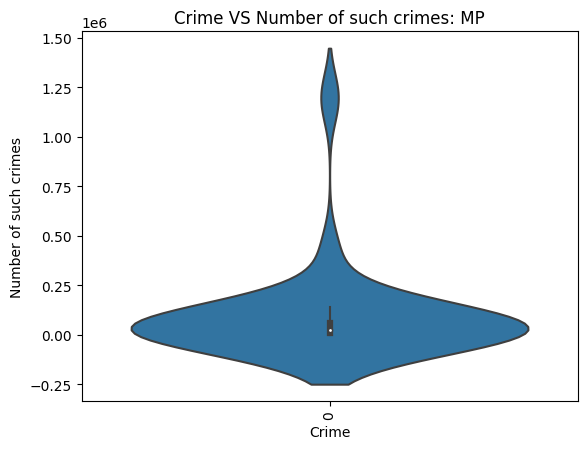

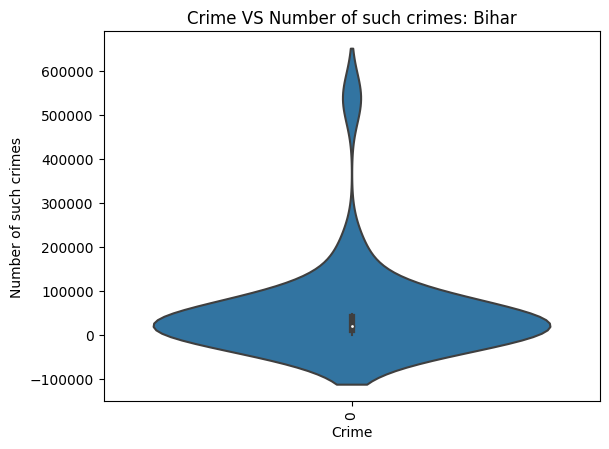

In [17]:
cnt = 0
for i in [maharashtra, up, mp, bihar]:
    sns.violinplot(i)
    plt.xlabel(f"Crime")
    plt.ylabel(f"Number of such crimes")
    plt.title(f"Crime VS Number of such crimes: {s[cnt]}")
    cnt += 1
    plt.xticks(rotation=90)
    plt.show()

## Observations:
- Violin plots are an improvement over box plots and they also show the density (here, magnitude) variation of the values.
- By noticing the violin plots of each state parallely, we can conclude that UP, MP and Bihar have a similar distribution of crimes, whereas, Maharashtra has a good spread of crimes varying from Theft to Other IPC Crimes
- It can also be noticed here too that the crime ratios are same for all 4 states as the shapes of violin plots are almost similar


Radar Chart

In [18]:
categories = data1.columns[[3, 4, 5, 6, 7, 8, 9, 10]]

print("Radar Chart")
fig = go.Figure()
plt.Figure(figsize =(5, 3))

fig.add_trace(go.Scatterpolar(r=maharashtra, theta=categories, fill='toself', name='maharashtra'))
fig.add_trace(go.Scatterpolar(r=up, theta=categories, fill='toself', name='up'))
fig.add_trace(go.Scatterpolar(r=mp, theta=categories, fill='toself', name='mp'))
fig.add_trace(go.Scatterpolar(r=bihar, theta=categories, fill='toself', name='bihar'))

fig.update_layout(autosize=False, width=400, height=400)

fig.show()



Radar Chart


## Observations:
- The above radar chart is for some attributes, like murder, attempt to murder, etc.
- It is clear from this that in those attributes, states Maharashtra, UP, and Bihar have similar ratios of crimes and MP has a rather different and high rates of rapes when compared to other 3 states
- The parameters can be changed and more such conclusions can be made about the crimes


Funnel Chart

In [19]:
# Data as a dictionary
arr = []
for i in data1.columns[3:]:
    arr.append(math.ceil(statistics.mean(data1[i])))
    
data = dict(time=arr,
            steps=data1.columns[3:])

fig = px.funnel(data, x='time', y='steps')
fig.show()

## Observations:
- From the given funnel chart, we can see that Other IPC crimes are the majorly occurring crimes in India followed by crimes due to hurt, thefts and burglaries respectively

Pareto Chart

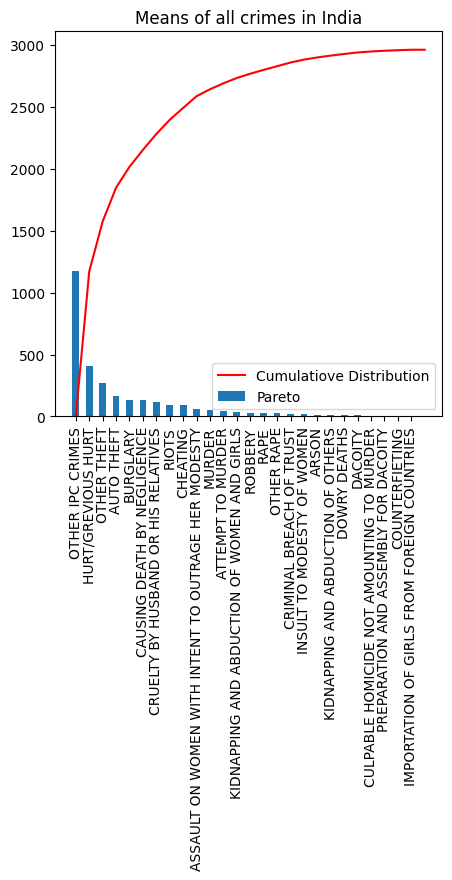

In [20]:
# Pareto Chart - Bar Chart in ascending/descending order
fig = plt.figure(figsize = (5, 5))

plott = []
for i in range(len(attributes)):
#     plott.append([statistics.mean(data1[data1.columns[i+3]]), i])
    plott.append([statistics.mean(data1[data1.columns[i+3]]), i])

# plott = [plott[0][0],plott[1][0], plott[2][0], plott[3][0], plott[4][0]]
plottt = []
label = []

plott.sort(reverse = True)

# print(plott)

for i in range(len(plott)):
    plottt.append(plott[i][0])
    label.append(data1.columns[plott[i][1] + 3])

plott = plottt

cumulative = []
cumulative.append(0)
for i in range(len(plott)):
    if(i == 0):
        cumulative.append(plott[0])
    else:
        cumulative.append(cumulative[i] + plott[i])
    
    
# creating the bar plot
plt.bar(label, plott, width = 0.5)
# Cumulative Plot
plt.plot(cumulative, color = "red")

# plt.xlabel("Species")
# plt.ylabel("Cms")
plt.title(f"Means of all crimes in India")
plt.legend([ "Cumulatiove Distribution","Pareto"])
plt.xticks(rotation = 90)
plt.show()

## Observations:
- From the given Pareto Chart, we can conclude that, Other IPC Crimes occur the most, followed by Hurtful Crimes, theft based crimes, crimes due to negligence and so on.
- In summation around 3000+ crimes occur every year in India


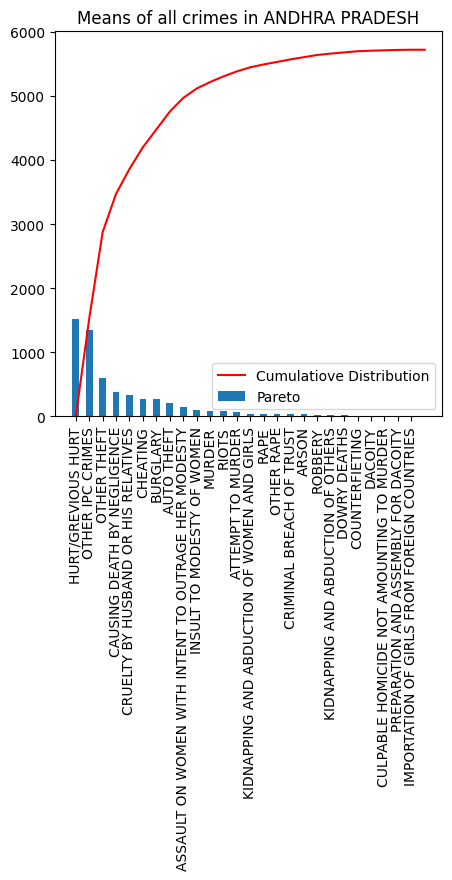

In [21]:
def pareto_state_wise(state):
    fig = plt.figure(figsize = (5, 5))
#     dataa = data1.query(f'STATE/UT == {state}')
    delete = []
    for i in data1.index:
        if data1["STATE/UT"][i] != state:
            delete.append(i)
    dataaa = data1
    dataa = dataaa.drop(delete)
#     print(dataa)
    plott = []
    for i in range(len(attributes)):
    #     plott.append([statistics.mean(data1[data1.columns[i+3]]), i])
        plott.append([statistics.mean(dataa[dataa.columns[i+3]]), i])

    # plott = [plott[0][0],plott[1][0], plott[2][0], plott[3][0], plott[4][0]]
    plottt = []
    label = []

    plott.sort(reverse = True)

    # print(plott)

    for i in range(len(plott)):
        plottt.append(plott[i][0])
        label.append(dataa.columns[plott[i][1] + 3])

    plott = plottt

    cumulative = []
    cumulative.append(0)
    for i in range(len(plott)):
        if(i == 0):
            cumulative.append(plott[0])
        else:
            cumulative.append(cumulative[i] + plott[i])
    
    # creating the bar plot
    plt.bar(label, plott, width = 0.5)
    # Cumulative Plot
    plt.plot(cumulative, color = "red")

    plt.title(f"Means of all crimes in {state}")
    plt.legend([ "Cumulatiove Distribution","Pareto"])
    plt.xticks(rotation = 90)
    plt.show()  
    return


string = "ANDHRA PRADESH"
pareto_state_wise(string)

## Observations:
- It can be seen that in Andhra Pradesh, hurt induced crimes occur the most, followed by other IPC crimes, theft and so on.
- Average crime rate goes upto 6000 which is way more than the overall India’s average (around 3000). This implies that Andhra Pradesh is a state prone to crimes


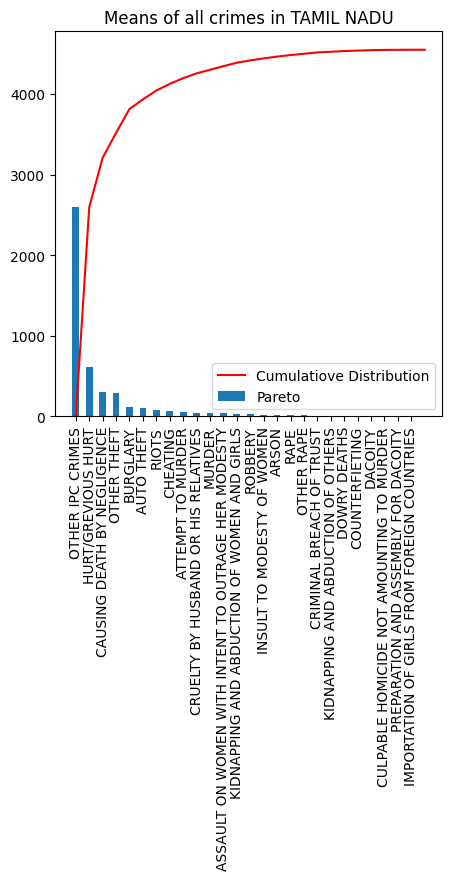

In [22]:
string = "TAMIL NADU"
pareto_state_wise(string)

## Observations:
- It can be seen that in Tamil Nadu, other IPC crimes occur the most, followed by hurt crimes, Crimes due to negligence and so on.
- Average crime rate goes upto 4000 which is way more than the overall India’s average (around 3000). This implies that Tamil Nadu is a state slightly more prone to crimes


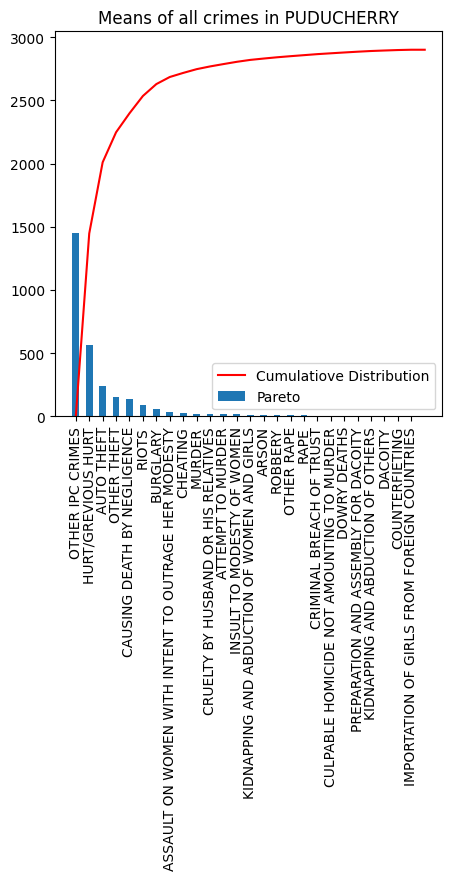

In [23]:
string = "PUDUCHERRY"
pareto_state_wise(string)

## ENDSEMESTER
- (i) FIM_1 Q: Test drive FP Growth algorithm to generate association rules satisfying minimum support and confidence
- (ii) FIM_2 Q: Generate Closed Frequent Itemsets by employing CLOSET algorithm
- (iii) Predictive Analytics Q: Test drive Decision Tree or Hierarchichal AGNES clustering based on the nature of labelled or unlabeled data set
- (iv) PySpark Q: Test drive any two of (i,ii,iii) in Pyspark platform and establish the performance enhancement achieved by the big data support from Pyspark
- Instructions: All implementations should be clearly commented with corresponding outputs clearly explained witH interpretations / conclusions wherever required

In [24]:
data1

STATE/UT       DISTRICT  YEAR  MURDER  ATTEMPT TO MURDER  \
0     ANDHRA PRADESH       ADILABAD  2001     101                 60   
1     ANDHRA PRADESH      ANANTAPUR  2001     151                125   
2     ANDHRA PRADESH       CHITTOOR  2001     101                 57   
3     ANDHRA PRADESH       CUDDAPAH  2001      80                 53   
4     ANDHRA PRADESH  EAST GODAVARI  2001      82                 67   
...              ...            ...   ...     ...                ...   
9010        DELHI UT            STF  2012      52                  1   
9011        DELHI UT           WEST  2012      52                 37   
9012     LAKSHADWEEP    LAKSHADWEEP  2012      52                 32   
9014      PUDUCHERRY       KARAIKAL  2012       5                  6   
9015      PUDUCHERRY     PUDUCHERRY  2012      24                 21   

      CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  OTHER RAPE  \
0                                            17    50          50   
1                                             1    23          23   
2                                             2    27          27   
3                                             1    20          20   
4                                             1    23          23   
...                                         ...   ...         ...   
9010                                          9    35          35   
9011                                         10    79          79   
9012                                          9    35          35   
9014                                          2     6           6   
9015                                         10     7           7   

      KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS  \
0                                              30   
1                                              30   
2                                              34   
3                                              20   
4                                              26   
...                                           ...   
9010                                           65   
9011                                          256   
9012                                           65   
9014                                            2   
9015                                           14   

      KIDNAPPING AND ABDUCTION OF OTHERS  ...  COUNTERFIETING  ARSON  \
0                                     16  ...               1     30   
1                                     23  ...               8     69   
2                                     25  ...               9     38   
3                                      5  ...               2     23   
4                                     23  ...               3     41   
...                                  ...  ...             ...    ...   
9010                                   8  ...               2      3   
9011                                 198  ...               2     18   
9012                                   8  ...               3      3   
9014                                   8  ...               1      1   
9015                                   3  ...               5     20   

      HURT/GREVIOUS HURT  DOWRY DEATHS  \
0                   1131            16   
1                   1543             7   
2                   2088            14   
3                    795            17   
4                   1244            12   
...                  ...           ...   
9010                  93            15   
9011                 227            18   
9012                   3            15   
9014                 186            15   
9015                 632            15   

      ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY  \
0                                                   149     
1                                                   118     
2                                                   112     
3                                                   126     
4     

## (i) Test drive FP Growth algorithm to generate association rules satisfying minimum support and confidence

In [25]:
# Step 1: Modify the Crimes dataset format to align with FP Growth Algorithm
# Treat every state as a transaction
# Generate an indexed vector where index is the crimes in order same as the columns
# First, we do data thresholding, where if the value is greater than it's average, we assign 1, else 0
# We then generate a indexed vector for each state

data = pd.read_csv(r"01_District_wise_crimes_committed_IPC_2001_2012.csv")
# Get State-wise data
states_list = list(set(data1['STATE/UT']))
states_input_vectors = [[0]*26]*len(states_list)

# Find averages of each column individually
overall_averages = []
for i in range(3, len(data1.columns)):
    overall_averages.append(statistics.median(data[data.columns[i]]))

for i in data1.index:
    for crimes in range(len(overall_averages)):
        states_input_vectors[states_list.index(data1['STATE/UT'][i])][crimes] += int(data1[req_attributes[crimes+3]][i])

In [26]:
final_states_input_vectors = []
for i in range(len(states_input_vectors)):
    v1 = []
    for j in range(len(states_input_vectors[0])):
        v1.append(states_input_vectors[i][j]//len(data1[data1['STATE/UT'] == states_list[i]]))
    final_states_input_vectors.append(v1)
# print(final_states_input_vectors)    


#Thresholding based on the average value
finall_states_input_vectors = []
for i in range(len(final_states_input_vectors)):
    v2 = []
    for j in range(len(final_states_input_vectors[0])):
        avg = overall_averages[j]
        if final_states_input_vectors[i][j] >= avg:
            v2.append(data1.columns[j+3])
        else:
            v2.append('No ' + data1.columns[j+3])
    finall_states_input_vectors.append(v2)
dataframe_fpga = pd.DataFrame(finall_states_input_vectors)
dataframe_fpga.columns = req_attributes[3:]
dataframe_fpga

MURDER  ATTEMPT TO MURDER  CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  \
0   MURDER  ATTEMPT TO MURDER  CULPABLE HOMICIDE NOT AMOUNTING TO MURDER   
1   MURDER  ATTEMPT TO MURDER  CULPABLE HOMICIDE NOT AMOUNTING TO MURDER   
2   MURDER  ATTEMPT TO MURDER  CULPABLE HOMICIDE NOT AMOUNTING TO MURDER   
3   MURDER  ATTEMPT TO MURDER  CULPABLE HOMICIDE NOT AMOUNTING TO MURDER   
4   MURDER  ATTEMPT TO MURDER  CULPABLE HOMICIDE NOT AMOUNTING TO MURDER   
5   MURDER  ATTEMPT TO MURDER  CULPABLE HOMICIDE NOT AMOUNTING TO MURDER   
6   MURDER  ATTEMPT TO MURDER  CULPABLE HOMICIDE NOT AMOUNTING TO MURDER   
7   MURDER  ATTEMPT TO MURDER  CULPABLE HOMICIDE NOT AMOUNTING TO MURDER   
8   MURDER  ATTEMPT TO MURDER  CULPABLE HOMICIDE NOT AMOUNTING TO MURDER   
9   MURDER  ATTEMPT TO MURDER  CULPABLE HOMICIDE NOT AMOUNTING TO MURDER   
10  MURDER  ATTEMPT TO MURDER  CULPABLE HOMICIDE NOT AMOUNTING TO MURDER   
11  MURDER  ATTEMPT TO MURDER  CULPABLE HOMICIDE NOT AMOUNTING TO MURDER   
12  MURDER  ATTEMPT TO MURDER  CULPABLE HOMICIDE NOT AMOUNTING TO MURDER   
13  MURDER  ATTEMPT TO MURDER  CULPABLE HOMICIDE NOT AMOUNTING TO MURDER   
14  MURDER  ATTEMPT TO MURDER  CULPABLE HOMICIDE NOT AMOUNTING TO MURDER   
15  MURDER  ATTEMPT TO MURDER  CULPABLE HOMICIDE NOT AMOUNTING TO MURDER   
16  MURDER  ATTEMPT TO MURDER  CULPABLE HOMICIDE NOT AMOUNTING TO MURDER   
17  MURDER  ATTEMPT TO MURDER  CULPABLE HOMICIDE NOT AMOUNTING TO MURDER   
18  MURDER  ATTEMPT TO MURDER  CULPABLE HOMICIDE NOT AMOUNTING TO MURDER   
19  MURDER  ATTEMPT TO MURDER  CULPABLE HOMICIDE NOT AMOUNTING TO MURDER   
20  MURDER  ATTEMPT TO MURDER  CULPABLE HOMICIDE NOT AMOUNTING TO MURDER   
21  MURDER  ATTEMPT TO MURDER  CULPABLE HOMICIDE NOT AMOUNTING TO MURDER   
22  MURDER  ATTEMPT TO MURDER  CULPABLE HOMICIDE NOT AMOUNTING TO MURDER   
23  MURDER  ATTEMPT TO MURDER  CULPABLE HOMICIDE NOT AMOUNTING TO MURDER   
24  MURDER  ATTEMPT TO MURDER  CULPABLE HOMICIDE NOT AMOUNTING TO MURDER   
25  MURDER  ATTEMPT TO MURDER  CULPABLE HOMICIDE NOT AMOUNTING TO MURDER   
26  MURDER  ATTEMPT TO MURDER  CULPABLE HOMICIDE NOT AMOUNTING TO MURDER   
27  MURDER  ATTEMPT TO MURDER  CULPABLE HOMICIDE NOT AMOUNTING TO MURDER   
28  MURDER  ATTEMPT TO MURDER  CULPABLE HOMICIDE NOT AMOUNTING TO MURDER   
29  MURDER  ATTEMPT TO MURDER  CULPABLE HOMICIDE NOT AMOUNTING TO MURDER   
30  MURDER  ATTEMPT TO MURDER  CULPABLE HOMICIDE NOT AMOUNTING TO MURDER   
31  MURDER  ATTEMPT TO MURDER  CULPABLE HOMICIDE NOT AMOUNTING TO MURDER   
32  MURDER  ATTEMPT TO MURDER  CULPABLE HOMICIDE NOT AMOUNTING TO MURDER   
33  MURDER  ATTEMPT TO MURDER  CULPABLE HOMICIDE NOT AMOUNTING TO MURDER   
34  MURDER  ATTEMPT TO MURDER  CULPABLE HOMICIDE NOT AMOUNTING TO MURDER   

    RAPE  OTHER RAPE  KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS  \
0   RAPE  OTHER RAPE  KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS   
1   RAPE  OTHER RAPE  KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS   
2   RAPE  OTHER RAPE  KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS   
3   RAPE  OTHER RAPE  KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS   
4   RAPE  OTHER RAPE  KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS   
5   RAPE  OTHER RAPE  KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS   
6   RAPE  OTHER RAPE  KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS   
7   RAPE  OTHER RAPE  KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS   
8   RAPE  OTHER RAPE  KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS   
9   RAPE  OTHER RAPE  KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS   
10  RAPE  OTHER RAPE  KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS   
11  RAPE  OTHER RAPE  KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS   
12  RAPE  OTHER RAPE  KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS   
13  RAPE  OTHER RAPE  KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS   
14  RAPE  OTHER RAPE  KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS   
15  RAPE  OTHER RAPE  KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS   
16  RAPE  OTHER RAPE  KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS   
17  RAPE  OTHER RAPE  KID

In [27]:
# To convert the data to NumPy formal
transaction = []
for i in range(0, dataframe_fpga.shape[0]):
    for j in range(3, dataframe_fpga.shape[1]):
        transaction.append(dataframe_fpga.values[i,j-3])
# converting to numpy array
transaction = np.array(transaction)
print(transaction)

['MURDER' 'ATTEMPT TO MURDER' 'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER'
 'RAPE' 'OTHER RAPE' 'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS'
 'KIDNAPPING AND ABDUCTION OF OTHERS' 'DACOITY'
 'PREPARATION AND ASSEMBLY FOR DACOITY' 'ROBBERY' 'BURGLARY' 'AUTO THEFT'
 'OTHER THEFT' 'RIOTS' 'CRIMINAL BREACH OF TRUST' 'CHEATING'
 'COUNTERFIETING' 'ARSON' 'HURT/GREVIOUS HURT' 'DOWRY DEATHS'
 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY'
 'INSULT TO MODESTY OF WOMEN' 'CRUELTY BY HUSBAND OR HIS RELATIVES'
 'MURDER' 'ATTEMPT TO MURDER' 'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER'
 'RAPE' 'OTHER RAPE' 'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS'
 'KIDNAPPING AND ABDUCTION OF OTHERS' 'DACOITY'
 'PREPARATION AND ASSEMBLY FOR DACOITY' 'ROBBERY' 'BURGLARY' 'AUTO THEFT'
 'OTHER THEFT' 'RIOTS' 'CRIMINAL BREACH OF TRUST' 'CHEATING'
 'COUNTERFIETING' 'ARSON' 'HURT/GREVIOUS HURT' 'DOWRY DEATHS'
 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY'
 'INSULT TO MODESTY OF WOMEN' 'CRUELTY BY HUSBAND 

In [28]:
#  Transform Them a Pandas DataFrame
df = pd.DataFrame(transaction, columns=["items"]) 
# Put 1 to Each Item For Making Countable Table, to be able to perform Group By
df["incident_count"] = 1
#  Delete NaN Items from Dataset
indexNames = df[df['items'] == "nan" ].index
df.drop(indexNames , inplace=True)
# Making a New Appropriate Pandas DataFrame for Visualizations  
df_table = df.groupby("items").sum().sort_values("incident_count", ascending=False).reset_index()
#  Initial Visualizations
df_table.head(30).style.background_gradient(cmap='Blues')

In [29]:
import plotly.express as px
# to have a same origin
df_table["all"] = "Top 50 items" 
# creating tree map using plotly
fig = px.treemap(df_table.head(50), path=['all', "items"], values='incident_count',
                  color=df_table["incident_count"].head(50), hover_data=['items'],
                  color_continuous_scale='Blues',
                )
# ploting the treemap
fig.show()

In [30]:
# Transform Every Transaction to Seperate List & Gather Them into Numpy Array
transaction = []
for i in range(dataframe_fpga.shape[0]):
    transaction.append([str(dataframe_fpga.values[i,j]) for j in range(dataframe_fpga.shape[1])])
# creating the numpy array of the transactions
transaction = np.array(transaction)
# importing the required module
from mlxtend.preprocessing import TransactionEncoder
# initializing the transactionEncoder
te = TransactionEncoder()
te_ary = te.fit(transaction).transform(transaction)
dataset = pd.DataFrame(te_ary, columns=te.columns_)


for i in dataframe_fpga.columns:
    dataframe_fpga.loc[(dataframe_fpga[i] == 'No ' + i), i] = False
    dataframe_fpga.loc[(dataframe_fpga[i] == i), i] = True

dataframe_fpga['No COUNTERFIETING'] = dataframe_fpga['COUNTERFIETING']
dataframe_fpga['No INSULT TO MODESTY OF WOMEN'] = dataframe_fpga['INSULT TO MODESTY OF WOMEN']
dataframe_fpga['No CRIMINAL BREACH OF TRUST'] = dataframe_fpga['CRIMINAL BREACH OF TRUST']

# dataset after encoded
dataframe_fpga.head(10)

MURDER ATTEMPT TO MURDER CULPABLE HOMICIDE NOT AMOUNTING TO MURDER  RAPE  \
0   True              True                                      True  True   
1   True              True                                      True  True   
2   True              True                                      True  True   
3   True              True                                      True  True   
4   True              True                                      True  True   
5   True              True                                      True  True   
6   True              True                                      True  True   
7   True              True                                      True  True   
8   True              True                                      True  True   
9   True              True                                      True  True   

  OTHER RAPE KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS  \
0       True                                        True   
1       True                                        True   
2       True                                        True   
3       True                                        True   
4       True                                        True   
5       True                                        True   
6       True                                        True   
7       True                                        True   
8       True                                        True   
9       True                                        True   

  KIDNAPPING AND ABDUCTION OF OTHERS DACOITY  \
0                               True    True   
1                               True    True   
2                               True    True   
3                               True    True   
4                               True    True   
5                               True    True   
6                               True    True   
7                               True    True   
8                               True    True   
9                               True    True   

  PREPARATION AND ASSEMBLY FOR DACOITY ROBBERY  ... DOWRY DEATHS  \
0                                 True    True  ...         True   
1                                 True    True  ...         True   
2                                 True    True  ...         True   
3                                 True    True  ...         True   
4                                 True    True  ...         True   
5                                 True    True  ...         True   
6                                 True    True  ...         True   
7                                 True    True  ...         True   
8                                 True    True  ...         True   
9                                 True    True  ...         True   

  ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY  \
0                                               True    
1                                               True    
2                                               True    
3                                               True    
4                                               True    
5                                               True    
6                                               True    
7                                               True    
8                                               True    
9                                               True    

  INSULT TO MODESTY OF WOMEN CRUELTY BY HUSBAND OR HIS RELATIVES  \
0                       True                                True   
1                       True                                True   
2                       True                                True   
3                       True                                True   
4                       True                                True   
5                       True                                True   
6                       True                                True   
7                       True    

## Observations:
- It is evident from the tree map that majority of the crimes are occuring in almost similar numbers.
- So there might be a chance that FP Growth algorithm may not be that useful in determining associativity rules

In [31]:
# select top 30 items
first30 = df_table["items"].head(10).values 
# Extract Top 30
dataset = dataframe_fpga.loc[:,first30] 
# shape of the dataset
dataset.shape

(35, 10)

In [32]:
#Importing Libraries
from mlxtend.frequent_patterns import fpgrowth
#running the fpgrowth algorithm
res=fpgrowth(dataset,min_support=0.5, use_colnames=True)
# printing top 10
print(res)

      support                                           itemsets
0         1.0               (KIDNAPPING AND ABDUCTION OF OTHERS)
1         1.0      (KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS)
2         1.0                                           (MURDER)
3         1.0                                       (OTHER RAPE)
4         1.0                                      (OTHER THEFT)
...       ...                                                ...
1018      1.0  (RAPE, KIDNAPPING AND ABDUCTION OF WOMEN AND G...
1019      1.0  (RAPE, OTHER RAPE, KIDNAPPING AND ABDUCTION OF...
1020      1.0  (RAPE, OTHER RAPE, DOWRY DEATHS, OTHER THEFT, ...
1021      1.0  (RAPE, OTHER RAPE, KIDNAPPING AND ABDUCTION OF...
1022      1.0  (RAPE, OTHER RAPE, KIDNAPPING AND ABDUCTION OF...

[1023 rows x 2 columns]


c:\users\dhyut\appdata\local\programs\python\python38\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



In [33]:
# importing required module
from mlxtend.frequent_patterns import association_rules
# creating asssociation rules
res=association_rules(res, metric="lift", min_threshold=1)
# printing association rules
res

antecedents  \
0      (KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS)   
1               (KIDNAPPING AND ABDUCTION OF OTHERS)   
2                                           (MURDER)   
3               (KIDNAPPING AND ABDUCTION OF OTHERS)   
4                                       (OTHER RAPE)   
...                                              ...   
56997                                        (ARSON)   
56998                                       (MURDER)   
56999         (PREPARATION AND ASSEMBLY FOR DACOITY)   
57000                                        (RIOTS)   
57001           (KIDNAPPING AND ABDUCTION OF OTHERS)   

                                             consequents  antecedent support  \
0                   (KIDNAPPING AND ABDUCTION OF OTHERS)                 1.0   
1          (KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS)                 1.0   
2                   (KIDNAPPING AND ABDUCTION OF OTHERS)                 1.0   
3                                               (MURDER)                 1.0   
4                   (KIDNAPPING AND ABDUCTION OF OTHERS)                 1.0   
...                                                  ...                 ...   
56997  (RAPE, OTHER RAPE, KIDNAPPING AND ABDUCTION OF...                 1.0   
56998  (RAPE, OTHER RAPE, KIDNAPPING AND ABDUCTION OF...                 1.0   
56999  (RAPE, OTHER RAPE, KIDNAPPING AND ABDUCTION OF...                 1.0   
57000  (RAPE, OTHER RAPE, KIDNAPPING AND ABDUCTION OF...                 1.0   
57001  (RAPE, OTHER RAPE, KIDNAPPING AND ABDUCTION OF...                 1.0   

       consequent support  support  confidence  lift  leverage  conviction  
0                     1.0      1.0         1.0   1.0       0.0         inf  
1                     1.0      1.0         1.0   1.0       0.0         inf  
2                     1.0      1.0         1.0   1.0       0.0         inf  
3                     1.0      1.0         1.0   1.0       0.0         inf  
4                     1.0      1.0         1.0   1.0       0.0         inf  
...                   ...      ...         ...   ...       ...         ...  
56997                 1.0      1.0         1.0   1.0       0.0         inf  
56998                 1.0      1.0         1.0   1.0       0.0         inf  
56999                 1.0      1.0         1.0   1.0       0.0         inf  
57000                 1.0      1.0         1.0   1.0       0.0         inf  
57001                 1.0      1.0         1.0   1.0       0.0         inf  

[57002 rows x 9 columns]

In [34]:
# Sort values based on confidence
res.sort_values("confidence",ascending=False)

antecedents  \
0          (KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS)   
38004  (OTHER RAPE, KIDNAPPING AND ABDUCTION OF WOMEN...   
37993  (OTHER THEFT, ARSON, KIDNAPPING AND ABDUCTION ...   
37994  (OTHER THEFT, KIDNAPPING AND ABDUCTION OF WOME...   
37995  (ARSON, KIDNAPPING AND ABDUCTION OF WOMEN AND ...   
...                                                  ...   
19005          (OTHER THEFT, RIOTS, ARSON, DOWRY DEATHS)   
19006  (OTHER THEFT, ARSON, DOWRY DEATHS, KIDNAPPING ...   
19007           (OTHER THEFT, RIOTS, DOWRY DEATHS, RAPE)   
19008  (OTHER THEFT, DOWRY DEATHS, KIDNAPPING AND ABD...   
57001               (KIDNAPPING AND ABDUCTION OF OTHERS)   

                                             consequents  antecedent support  \
0                   (KIDNAPPING AND ABDUCTION OF OTHERS)                 1.0   
38004          (OTHER THEFT, RIOTS, ARSON, DOWRY DEATHS)                 1.0   
37993  (OTHER RAPE, DOWRY DEATHS, PREPARATION AND ASS...                 1.0   
37994                  (OTHER RAPE, ARSON, DOWRY DEATHS)                 1.0   
37995            (OTHER THEFT, OTHER RAPE, DOWRY DEATHS)                 1.0   
...                                                  ...                 ...   
19005         (KIDNAPPING AND ABDUCTION OF OTHERS, RAPE)                 1.0   
19006                                      (RIOTS, RAPE)                 1.0   
19007        (ARSON, KIDNAPPING AND ABDUCTION OF OTHERS)                 1.0   
19008                                     (ARSON, RIOTS)                 1.0   
57001  (RAPE, OTHER RAPE, KIDNAPPING AND ABDUCTION OF...                 1.0   

       consequent support  support  confidence  lift  leverage  conviction  
0                     1.0      1.0         1.0   1.0       0.0         inf  
38004                 1.0      1.0         1.0   1.0       0.0         inf  
37993                 1.0      1.0         1.0   1.0       0.0         inf  
37994                 1.0      1.0         1.0   1.0       0.0         inf  
37995                 1.0      1.0         1.0   1.0       0.0         inf  
...                   ...      ...         ...   ...       ...         ...  
19005                 1.0      1.0         1.0   1.0       0.0         inf  
19006                 1.0      1.0         1.0   1.0       0.0         inf  
19007                 1.0      1.0         1.0   1.0       0.0         inf  
19008                 1.0      1.0         1.0   1.0       0.0         inf  
57001                 1.0      1.0         1.0   1.0       0.0         inf  

[57002 rows x 9 columns]

## Observations:
- As discussed above, almost all the crimes are being occured at the same rates and their associativity is a little difficult to find using FP Growth Algorithm

## (ii) Generate Closed Frequent Itemsets by employing CLOSET algorithm

In [35]:
#getting required data
tr = TransactionEncoder()
tr_arr = tr.fit(finall_states_input_vectors).transform(finall_states_input_vectors)
df = pd.DataFrame(tr_arr, columns=tr.columns_)
df[:10]

ARSON  ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY  \
0   True                                               True     
1   True                                               True     
2   True                                               True     
3   True                                               True     
4   True                                               True     
5   True                                               True     
6   True                                               True     
7   True                                               True     
8   True                                               True     
9   True                                               True     

   ATTEMPT TO MURDER  AUTO THEFT  BURGLARY  CAUSING DEATH BY NEGLIGENCE  \
0               True        True      True                         True   
1               True        True      True                         True   
2               True        True      True                         True   
3               True        True      True                         True   
4               True        True      True                         True   
5               True        True      True                         True   
6               True        True      True                         True   
7               True        True      True                         True   
8               True        True      True                         True   
9               True        True      True                         True   

   CHEATING  COUNTERFIETING  CRIMINAL BREACH OF TRUST  \
0      True            True                      True   
1      True            True                      True   
2      True            True                      True   
3      True            True                      True   
4      True            True                      True   
5      True            True                      True   
6      True            True                      True   
7      True            True                      True   
8      True            True                      True   
9      True            True                      True   

   CRUELTY BY HUSBAND OR HIS RELATIVES  ...  No COUNTERFIETING  \
0                                 True  ...              False   
1                                 True  ...              False   
2                                 True  ...              False   
3                                 True  ...              False   
4                                 True  ...              False   
5                                 True  ...              False   
6                                 True  ...              False   
7                                 True  ...              False   
8                                 True  ...              False   
9                                 True  ...              False   

   No IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES  \
0                                           False   
1                                            True   
2                                            True   
3                                           False   
4                                            True   
5                                            True   
6                                            True   
7                                            True   
8                                            True   
9                                           False   

   No INSULT TO MODESTY OF WOMEN  OTHER IPC CRIMES  OTHER RAPE  OTHER THEFT  \
0                          False              True        True         True   
1                          False              True        True         True   
2                          False              True        True         True   
3                          False              True        True         True   
4                          False              True        True         True   
5                          False              Tr

In [49]:
# Find Frequent Itemsets
from mlxtend.frequent_patterns import apriori
frequent_itemsets = apriori(dataset[:10], min_support = 1, use_colnames = True)
print(frequent_itemsets)

     support                                           itemsets
0        1.0                                            (ARSON)
1        1.0                                     (DOWRY DEATHS)
2        1.0                                            (RIOTS)
3        1.0                                             (RAPE)
4        1.0             (PREPARATION AND ASSEMBLY FOR DACOITY)
...      ...                                                ...
1018     1.0  (OTHER RAPE, KIDNAPPING AND ABDUCTION OF WOMEN...
1019     1.0  (RAPE, OTHER RAPE, KIDNAPPING AND ABDUCTION OF...
1020     1.0  (RAPE, OTHER RAPE, KIDNAPPING AND ABDUCTION OF...
1021     1.0  (RAPE, OTHER RAPE, KIDNAPPING AND ABDUCTION OF...
1022     1.0  (RAPE, OTHER RAPE, KIDNAPPING AND ABDUCTION OF...

[1023 rows x 2 columns]


c:\users\dhyut\appdata\local\programs\python\python38\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



## Observations:
- It can be observed here that the number of frequent itemsets found here is 1023 which is  2^10 - 1
- The apriori algorithm concludes that all the subsets of the set of crimes, namely, ARSON, DOWRY DEATHS, RIOTS, RAPE,PREPARATION AND ASSEMBLY FOR DACOITY, OTHER RAPE,KIDNAPPING AND ABDUCTION OF WOMEN, etc are included in the frequent itemsets
- this means only the subset including all the 10 crimes is the closed frequency itemset
- => All the crimes are happening in same rates in all the states


## (iii) Predictive Analytics Q: Test drive Decision Tree or Hierarchichal AGNES clustering based on the nature of labelled or unlabeled data set

In [50]:
import matplotlib
import sys
matplotlib.use('Agg')
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

for i in dataframe_fpga.columns:
    dataframe_fpga.loc[(dataframe_fpga[i] == 'False'), i] = 0
    dataframe_fpga.loc[(dataframe_fpga[i] == 'True'), i] = 1

X = data1[["ARSON", "DOWRY DEATHS", "RIOTS", "RAPE"]][:50]
y = data1['STATE/UT'][:50]

# data1
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)

tree.plot_tree(dtree, feature_names=req_attributes)

#Two lines to make our compiler able to draw:
plt.savefig("DecisionTree.PNG")
sys.stdout.flush()
print("Decision Tree saved as DecisionTree.PNG in this directory")

Decision Tree saved as DecisionTree.PNG in this directory
